In [3]:
pip install pandas mlxtend

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 1.3 MB/s eta 0:00:02
   - -------------------------------------- 0.1/1.4 MB 1.7 MB/s eta 0:00:01
   --- ------------------------------------ 0.1/1.4 MB 1.2 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 1.8 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 2.0 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 2.2 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 2.3 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 2.4 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.4 MB 2.4 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.4 MB 2.5 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.4 MB 2.5 MB/s eta 0:00:01
   --------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as m

In [2]:
data = pd.read_csv('BreadBasket_DMS.csv')
data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, '10 Most Popular Items from DMS Bakery')

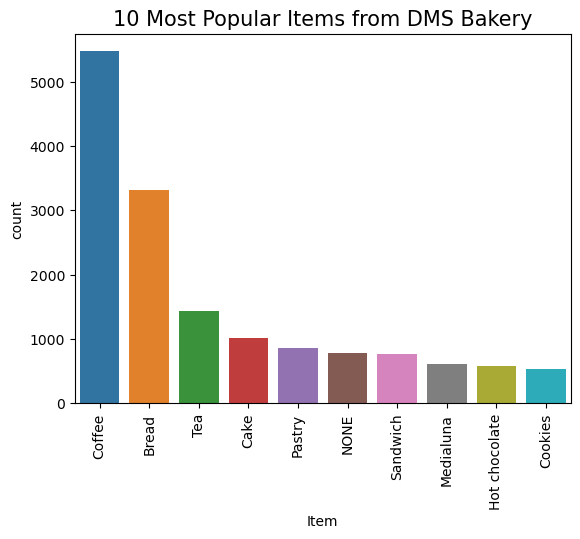

In [3]:
sns.countplot(x = 'Item', data = data, order = data['Item'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('10 Most Popular Items from DMS Bakery', fontsize = 15)

In [4]:
df = data.groupby(['Transaction','Item']).size().reset_index(name='count')
df.head()

,Transaction,Item,count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1


In [5]:
keranjang = (df.groupby(['Transaction', 'Item'])['count'].sum().unstack().reset_index().fillna(0).set_index('Transaction'))
keranjang.head(15)

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

keranjang_set = keranjang.applymap(encode_units)
keranjang_set.head()

C:\Users\Rendy Eka\AppData\Local\Temp\ipykernel_15696\4247567602.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  keranjang_set = keranjang.applymap(encode_units)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
frequent_itemsets = apriori(keranjang_set, min_support=0.01, use_colnames=True)
frequent_itemsets.head()

C:\Users\Rendy Eka\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036093,(Alfajores)
1,0.015948,(Baguette)
2,0.324940,(Bread)
3,0.039765,(Brownie)
4,0.103137,(Cake)


In [10]:
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.shape

(54, 10)

In [11]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
44,(Toast),(Coffee),0.033365,0.475081,0.023502,0.704403,1.482699,0.007651,1.775789,0.336791
43,(Spanish Brunch),(Coffee),0.018046,0.475081,0.010807,0.598837,1.260494,0.002233,1.308493,0.210458
29,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561,0.176213
34,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079,0.152626
2,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861,0.125899
27,(Juice),(Coffee),0.038296,0.475081,0.020460,0.534247,1.124537,0.002266,1.127031,0.115155
32,(NONE),(Coffee),0.079005,0.475081,0.042073,0.532537,1.120938,0.004539,1.122908,0.117145
36,(Sandwich),(Coffee),0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468,0.115847
17,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667,0.109767
38,(Scone),(Coffee),0.034309,0.475081,0.017941,0.522936,1.100729,0.001642,1.100310,0.094762


In [12]:
rules.sort_values('confidence', ascending=False, inplace=True)
top_rules = rules.head(10)

In [13]:
top_combinations = top_rules[['antecedents', 'consequents', 'confidence']]
print("Kombinasi Produk yang Sering Dibeli Bersama:")
print(top_combinations)

Kombinasi Produk yang Sering Dibeli Bersama:
         antecedents consequents  confidence
44           (Toast)    (Coffee)    0.704403
43  (Spanish Brunch)    (Coffee)    0.598837
29       (Medialuna)    (Coffee)    0.569231
34          (Pastry)    (Coffee)    0.552147
2        (Alfajores)    (Coffee)    0.540698
27           (Juice)    (Coffee)    0.534247
32            (NONE)    (Coffee)    0.532537
36        (Sandwich)    (Coffee)    0.532353
17            (Cake)    (Coffee)    0.526958
38           (Scone)    (Coffee)    0.522936


In [14]:
top_products = data['Item'].value_counts().iloc[:10]
print("10 Produk Terpopuler:")
print(top_products)

10 Produk Terpopuler:
Item
Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: count, dtype: int64


In [15]:
bottom_products = data['Item'].value_counts().iloc[-10:]
print("10 Produk Kurang Populer:")
print(bottom_products)

10 Produk Kurang Populer:
Item
Spread            2
Siblings          2
Gift voucher      1
Raw bars          1
Polenta           1
Chicken sand      1
The BART          1
Adjustment        1
Olum & polenta    1
Bacon             1
Name: count, dtype: int64
